In [1]:
import os
import shutil
import zipfile
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import nibabel as nib
import tensorflow as tf 
from PIL import Image
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
#the path of the input files
X_train_path = r"C:\Users\Pc\OneDrive\Documents\soumaya\ATLAS\data\volumes\X_train_input"
Y_train_path=  r"C:\Users\Pc\OneDrive\Documents\soumaya\ATLAS\data\volumes\Y_train_target"#the path of the target files
train_data_path= r"C:\Users\Pc\OneDrive\Bureau\ATLAS\Data_Training_655"#the path from where we are going to take the files
test_data_path= r"C:\Users\Pc\OneDrive\Bureau\ATLAS\Data_Testing_300"
X_test_path=r"C:\Users\Pc\OneDrive\Documents\soumaya\ATLAS\data\volumes\X_test_path"
Y_test_path=r"C:\Users\Pc\OneDrive\Documents\soumaya\ATLAS\data\volumes\Y_test_path"

In [5]:
def list_zipfiles(dir):
    zipfiles = [os.path.join(root, name)
             for root, dirs, files in os.walk(dir)
             for name in files
             if name.endswith((".gz"))]
    return zipfiles
#take all the files in  the subdirectories of the train/test files that ends with .GZ ie: all archived files

In [6]:
train_zipfiles= list_zipfiles(train_data_path)
test_zipfiles=list_zipfiles(test_data_path)


In [7]:
test_zipfiles

['C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s016\\ses-1\\anat\\sub-r005s016_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s025\\ses-1\\anat\\sub-r005s025_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s030\\ses-1\\anat\\sub-r005s030_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s034\\ses-1\\anat\\sub-r005s034_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s044\\ses-1\\anat\\sub-r005s044_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s047\\ses-1\\anat\\sub-r005s047_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s056\\ses-1\\anat\\sub-r005s056_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Testing_300\\R005\\sub-r005s057\\ses-1\\anat\\sub-r005s057_ses-1_T1w.nii.gz',


In [8]:
#check the paths of the files
train_zipfiles

['C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s001\\ses-1\\anat\\sub-r001s001_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s001\\ses-1\\anat\\sub-r001s001_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s002\\ses-1\\anat\\sub-r001s002_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s002\\ses-1\\anat\\sub-r001s002_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s003\\ses-1\\anat\\sub-r001s003_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s003\\ses-1\\anat\\sub-r001s003_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s004\\ses-1\\anat\\sub-r001s004_ses-1_space-orig_label-L_desc-T1les

In [9]:
#store seperatly the files of the input files and the target files 
def store_data_path_list(list_paths):
    zip_files_X=[]
    zip_files_Y=[]
    for zip_file in list_paths:
        if "lesion_mask" in zip_file: # if the name of the files contains lesion_mask it means that the file is a target file
            zip_files_Y.append(zip_file)
        else:
            zip_files_X.append(zip_file)
    return((zip_files_X,zip_files_Y))
train_zipfiles_X,train_zipfiles_Y=store_data_path_list(train_zipfiles)  


In [10]:
train_zipfiles_Y#check the paths of the target files

['C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s001\\ses-1\\anat\\sub-r001s001_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s002\\ses-1\\anat\\sub-r001s002_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s003\\ses-1\\anat\\sub-r001s003_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s004\\ses-1\\anat\\sub-r001s004_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s005\\ses-1\\anat\\sub-r001s005_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s006\\ses-1\\anat\\sub-r001s006_ses-1_space-orig_label-L_desc-T1lesion_mask.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS

In [11]:
len(train_zipfiles_Y)#check the number paths of the target files

655

In [12]:
train_zipfiles_X#check the paths of the input files

['C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s001\\ses-1\\anat\\sub-r001s001_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s002\\ses-1\\anat\\sub-r001s002_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s003\\ses-1\\anat\\sub-r001s003_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s004\\ses-1\\anat\\sub-r001s004_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s005\\ses-1\\anat\\sub-r001s005_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s006\\ses-1\\anat\\sub-r001s006_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s007\\ses-1\\anat\\sub-r001s007_ses-1_T1w.nii.gz',
 'C:\\Users\\Pc\\OneDrive\\Bureau\\ATLAS\\Data_Training_655\\R001\\sub-r001s008\\ses-1\\anat\\sub-r001s008_ses-1_T1w.n

In [13]:
len(train_zipfiles_X)#check the number paths of the input files

655

In [22]:
#copy the input files to a seprate folder
def copy_files_folder(dir,list_paths):
    for file in list_paths:
        name_file=os.path.basename(file)
        dst=os.path.join(dir,name_file)
        if (os.path.isfile(dst)==False):  
            shutil.copyfile(file, dst)
            
copy_files_folder(X_train_path,train_zipfiles_X)
copy_files_folder(Y_train_path,train_zipfiles_Y)
copy_files_folder(X_test_path,test_zipfiles)

In [23]:
#check the number of files in the folder
import os
initial_count = 0
directory = X_test_path
for path in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, path)):
        initial_count += 1
print(initial_count)

600


In [24]:
os.listdir(directory)

['sub-r005s016_ses-1_T1w.nii',
 'sub-r005s016_ses-1_T1w.nii.gz',
 'sub-r005s025_ses-1_T1w.nii',
 'sub-r005s025_ses-1_T1w.nii.gz',
 'sub-r005s030_ses-1_T1w.nii',
 'sub-r005s030_ses-1_T1w.nii.gz',
 'sub-r005s034_ses-1_T1w.nii',
 'sub-r005s034_ses-1_T1w.nii.gz',
 'sub-r005s044_ses-1_T1w.nii',
 'sub-r005s044_ses-1_T1w.nii.gz',
 'sub-r005s047_ses-1_T1w.nii',
 'sub-r005s047_ses-1_T1w.nii.gz',
 'sub-r005s056_ses-1_T1w.nii',
 'sub-r005s056_ses-1_T1w.nii.gz',
 'sub-r005s057_ses-1_T1w.nii',
 'sub-r005s057_ses-1_T1w.nii.gz',
 'sub-r005s059_ses-1_T1w.nii',
 'sub-r005s059_ses-1_T1w.nii.gz',
 'sub-r005s071_ses-1_T1w.nii',
 'sub-r005s071_ses-1_T1w.nii.gz',
 'sub-r005s072_ses-1_T1w.nii',
 'sub-r005s072_ses-1_T1w.nii.gz',
 'sub-r005s078_ses-1_T1w.nii',
 'sub-r005s078_ses-1_T1w.nii.gz',
 'sub-r005s079_ses-1_T1w.nii',
 'sub-r005s079_ses-1_T1w.nii.gz',
 'sub-r005s080_ses-1_T1w.nii',
 'sub-r005s080_ses-1_T1w.nii.gz',
 'sub-r005s082_ses-1_T1w.nii',
 'sub-r005s082_ses-1_T1w.nii.gz',
 'sub-r005s084_ses-1_T1w.

In [25]:
import gzip
#Extracting files in X_test/X_train/Y_train
def extracting_tarfiles(pth):
    for file in os.listdir(pth):    
        with gzip.GzipFile(os.path.join(pth,file)) as f_in:
             with open(os.path.join(pth,file[:-3]), 'wb') as f_out:
                    #if (os.path.isfile(f_out)==False):#verifier que le fihier extrait n'existe pas
                        shutil.copyfileobj(f_in, f_out)

In [18]:
#extracting_tarfiles(X_train_path)

In [19]:
#extracting_tarfiles(Y_train_path)

In [20]:
#extracting_tarfiles(X_test_path)

In [26]:
#storing names of images/masks in a list
import tarfile
images=[]
lesions=[]
for unzip_file in os.listdir(Y_train_path):
    if ".gz" not in unzip_file:
        lesions.append(unzip_file)
for unzip_file in os.listdir(X_train_path): 
    if ".gz" not in unzip_file:
        images.append(unzip_file)
assert len(images) == len(lesions)
        

In [27]:
images

['sub-r001s001_ses-1_T1w.nii',
 'sub-r001s002_ses-1_T1w.nii',
 'sub-r001s003_ses-1_T1w.nii',
 'sub-r001s004_ses-1_T1w.nii',
 'sub-r001s005_ses-1_T1w.nii',
 'sub-r001s006_ses-1_T1w.nii',
 'sub-r001s007_ses-1_T1w.nii',
 'sub-r001s008_ses-1_T1w.nii',
 'sub-r001s009_ses-1_T1w.nii',
 'sub-r001s010_ses-1_T1w.nii',
 'sub-r001s011_ses-1_T1w.nii',
 'sub-r001s012_ses-1_T1w.nii',
 'sub-r001s013_ses-1_T1w.nii',
 'sub-r001s014_ses-1_T1w.nii',
 'sub-r001s015_ses-1_T1w.nii',
 'sub-r001s016_ses-1_T1w.nii',
 'sub-r001s017_ses-1_T1w.nii',
 'sub-r001s018_ses-1_T1w.nii',
 'sub-r001s019_ses-1_T1w.nii',
 'sub-r001s020_ses-1_T1w.nii',
 'sub-r001s021_ses-1_T1w.nii',
 'sub-r001s022_ses-1_T1w.nii',
 'sub-r001s023_ses-1_T1w.nii',
 'sub-r001s024_ses-1_T1w.nii',
 'sub-r001s025_ses-1_T1w.nii',
 'sub-r001s026_ses-1_T1w.nii',
 'sub-r001s027_ses-1_T1w.nii',
 'sub-r001s028_ses-1_T1w.nii',
 'sub-r001s029_ses-1_T1w.nii',
 'sub-r001s030_ses-1_T1w.nii',
 'sub-r001s031_ses-1_T1w.nii',
 'sub-r001s032_ses-1_T1w.nii',
 'sub-r0

In [28]:
len(images)

655

In [29]:
lesions

['sub-r001s001_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s002_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s003_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s004_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s005_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s006_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s007_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s008_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s009_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s010_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s011_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s012_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s013_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s014_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s015_ses-1_space-orig_label-L_desc-T1lesion_mask.nii',
 'sub-r001s016_ses-1_spac

In [30]:
len(lesions) 

655

# Create a dataframe

In [31]:
data = pd.DataFrame({'images':images,'lesions':lesions})
data.head(9)

,images,lesions
0,sub-r001s001_ses-1_T1w.nii,sub-r001s001_ses-1_space-orig_label-L_desc-T1l...
1,sub-r001s002_ses-1_T1w.nii,sub-r001s002_ses-1_space-orig_label-L_desc-T1l...
2,sub-r001s003_ses-1_T1w.nii,sub-r001s003_ses-1_space-orig_label-L_desc-T1l...
3,sub-r001s004_ses-1_T1w.nii,sub-r001s004_ses-1_space-orig_label-L_desc-T1l...
4,sub-r001s005_ses-1_T1w.nii,sub-r001s005_ses-1_space-orig_label-L_desc-T1l...
5,sub-r001s006_ses-1_T1w.nii,sub-r001s006_ses-1_space-orig_label-L_desc-T1l...
6,sub-r001s007_ses-1_T1w.nii,sub-r001s007_ses-1_space-orig_label-L_desc-T1l...
7,sub-r001s008_ses-1_T1w.nii,sub-r001s008_ses-1_space-orig_label-L_desc-T1l...
8,sub-r001s009_ses-1_T1w.nii,sub-r001s009_ses-1_space-orig_label-L_desc-T1l...


In [32]:
data.shape

(655, 2)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   images   655 non-null    object
 1   lesions  655 non-null    object
dtypes: object(2)
memory usage: 10.4+ KB


# Viz data

Reading NIfTI images:<br>
NiBabel is a Python package for reading and writing neuroimaging data.

 

In [34]:
# the load() function to create a NiBabel image object from a NIfTI file
path_img=os.path.join(X_train_path,images[0])
t1_nib = nib.load(path_img)

Loading in a NIfTI file with NiBabel gives us a special type of data object which encodes all the information in the file.Each bit of information is called an attribute in Python’s terminology. To see all of these attributes, we type t1_img .

The header is a Python dictionary. Dictionaries are containers that hold pairs of objects - keys and values.

In [35]:
t1_hdr = t1_nib.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:8.832 TE:3.50'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 173 213 181   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 8.8320e-03 1.0000e+00
 1.0000e+00 6.0399e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -88.5
qoffset_y    

As you’ve seen above, the header contains useful information that gives us information about the properties (metadata) associated with the MR data we’ve loaded in. Now we’ll move in to loading the actual image data itself. We can achieve this by using the method called t1_img.get_fdata().

In [36]:
t1_data = t1_nib.get_fdata()
t1_data

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [37]:
type(t1_data)

numpy.memmap

In [38]:
t1_data.ndim

3

The data is a 3D array representing the image data

In [39]:
t1_data.dtype

dtype('float64')

In [40]:
type(t1_data.dtype)

numpy.dtype[float64]

In [41]:
t1_data.shape

(173, 213, 181)

* t1_data is a 3D MRI image.

* This brain was scanned in 173 slices with a resolution of 213 x 181 voxels per slice. That means there are:

173 * 213 * 181 = 6 669 669

voxels in total!

* each voxel in the array is a floating-point number.

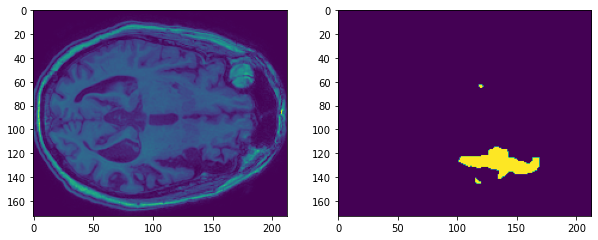

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
img=t1_nib.get_fdata()
plt.imshow(img[:,:,t1_nib.shape[2]//2])
plt.subplot(1,2,2)
path_lesion=os.path.join(Y_train_path,lesions[0])
mask1_nib = nib.load(path_lesion)
msk=mask1_nib.get_fdata()
plt.imshow(msk[:,:,mask1_nib.shape[2]//2])





# data Preprocessing

In [43]:
# Define constants
SEED = 909
BATCH_SIZE_TRAIN = 32
BATCH_SIZE_TEST = 32

IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)

data_dir = 'data/slices/'
data_dir_train = os.path.join(data_dir, 'training')
# The images should be stored under: "data/slices/training/img/img"
data_dir_train_image = os.path.join(data_dir_train, 'img')
# The images should be stored under: "data/slices/training/mask/img"
data_dir_train_mask = os.path.join(data_dir_train, 'mask')

data_dir_test = os.path.join(data_dir, 'test')
# The images should be stored under: "data/slices/test/img/img"
data_dir_test_image = os.path.join(data_dir_test, 'img')
# The images should be stored under: "data/slices/test/mask/img"
data_dir_test_mask = os.path.join(data_dir_test, 'mask')

NUM_TRAIN = 289792
NUM_TEST = 132776

NUM_OF_EPOCHS = 100

In [44]:
def create_segmentation_generator_train(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255
#                      featurewise_center=True,
#                      featurewise_std_normalization=True,
#                      rotation_range=90
#                      width_shift_range=0.2,
#                      height_shift_range=0.2,
#                      zoom_range=0.3
                        )
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return zip(img_generator, msk_generator)

# Remember not to perform any image augmentation in the test generator!
def create_segmentation_generator_test(img_path, msk_path, BATCH_SIZE):
    data_gen_args = dict(rescale=1./255)
    datagen = ImageDataGenerator(**data_gen_args)
    
    img_generator = datagen.flow_from_directory(img_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    msk_generator = datagen.flow_from_directory(msk_path, target_size=IMG_SIZE, class_mode=None, color_mode='grayscale', batch_size=BATCH_SIZE, seed=SEED)
    return zip(img_generator, msk_generator)

In [45]:
train_generator = create_segmentation_generator_train(data_dir_train_image, data_dir_train_mask, BATCH_SIZE_TRAIN)
test_generator = create_segmentation_generator_test(data_dir_test_image, data_dir_test_mask, BATCH_SIZE_TEST)

Found 289792 images belonging to 1 classes.
Found 289792 images belonging to 1 classes.
Found 132776 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


# Create Model

In [8]:
def unet(input_size=(256,256,181)):
    inputs = layers.Input(input_size)
    
    conv1 = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    bn1 = layers.Activation('relu')(conv1)
    conv1 = layers.Conv2D(64, (3, 3), padding='same')(bn1)
    bn1 = layers.BatchNormalization(axis=3)(conv1)
    bn1 = layers.Activation('relu')(bn1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = layers.Conv2D(128, (3, 3), padding='same')(pool1)
    bn2 = layers.Activation('relu')(conv2)
    conv2 = layers.Conv2D(128, (3, 3), padding='same')(bn2)
    bn2 = layers.BatchNormalization(axis=3)(conv2)
    bn2 = layers.Activation('relu')(bn2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)
    conv3 = layers.Conv2D(256, (3, 3), padding='same')(pool2)
    bn3 = layers.Activation('relu')(conv3)
    conv3 = layers.Conv2D(256, (3, 3), padding='same')(bn3)
    bn3 = layers.BatchNormalization(axis=3)(conv3)
    bn3 = layers.Activation('relu')(bn3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = layers.Conv2D(512, (3, 3), padding='same')(pool3)
    bn4 = layers.Activation('relu')(conv4)
    conv4 = layers.Conv2D(512, (3, 3), padding='same')(bn4)
    bn4 = layers.BatchNormalization(axis=3)(conv4)
    bn4 = layers.Activation('relu')(bn4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = layers.Conv2D(1024, (3, 3), padding='same')(pool4)
    bn5 = layers.Activation('relu')(conv5)
    conv5 = layers.Conv2D(1024, (3, 3), padding='same')(bn5)
    bn5 = layers.BatchNormalization(axis=3)(conv5)
    bn5 = layers.Activation('relu')(bn5)
    
    up6 = layers.concatenate([layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), padding='same')(up6)
    bn6 = layers.Activation('relu')(conv6)
    conv6 = layers.Conv2D(512, (3, 3), padding='same')(bn6)
    bn6 = layers.BatchNormalization(axis=3)(conv6)
    bn6 = layers.Activation('relu')(bn6)

    up7 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), padding='same')(up7)
    bn7 = layers.Activation('relu')(conv7)
    conv7 = layers.Conv2D(256, (3, 3), padding='same')(bn7)
    bn7 = layers.BatchNormalization(axis=3)(conv7)
    bn7 = layers.Activation('relu')(bn7)

    up8 = layers.concatenate([layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), padding='same')(up8)
    bn8 = layers.Activation('relu')(conv8)
    conv8 = layers.Conv2D(128, (3, 3), padding='same')(bn8)
    bn8 = layers.BatchNormalization(axis=3)(conv8)
    bn8 = layers.Activation('relu')(bn8)

    up9 = layers.concatenate([layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), padding='same')(up9)
    bn9 = layers.Activation('relu')(conv9)
    conv9 = layers.Conv2D(64, (3, 3), padding='same')(bn9)
    bn9 = layers.BatchNormalization(axis=3)(conv9)
    bn9 = layers.Activation('relu')(bn9)

    conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(bn9)

    return models.Model(inputs=[inputs], outputs=[conv10])

In [9]:
def hnet(n_levels, initial_features=32, n_blocks=2, kernel_size=3, pooling_size=2, in_channels=1, out_channels=1):
    inputs = keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, in_channels))
    x = inputs
    
    convpars = dict(kernel_size=kernel_size, activation='relu', padding='same')
    
    #downstream
    skips = {}
    for level in range(n_levels):
        for _ in range(n_blocks):
            x = layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
        if level < n_levels - 1:
            skips[level] = x
            x = layers.MaxPool2D(pooling_size)(x)
            
    # upstream
    for level in reversed(range(n_levels-1)):
        x = layers.Conv2DTranspose(initial_features * 2 ** level, strides=pooling_size, **convpars)(x)
        x = layers.Concatenate()([x, skips[level]])
        for _ in range(n_blocks):
            x = layers.Conv2D(initial_features * 2 ** level, **convpars)(x)
            
    # output
    activation = 'sigmoid' if out_channels == 1 else 'softmax'
    x = layers.Conv2D(out_channels, kernel_size=1, activation=activation, padding='same')(x)
    
    return models.Model(inputs=[inputs], outputs=[x], name=f'UNET-L{n_levels}-F{initial_features}')

# Dice coeff (loss and metrics)

In [10]:
smooth=1
def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)

In [11]:
model = hnet(6)

In [13]:
model1= unet()

NameError: name 'unet' is not defined

In [17]:
model.summary()

Model: "UNET-L6-F32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 256, 256, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_20[0][0]']              
                                )                                                       

                                                                                                  
 conv2d_39 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_38[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_8 (Conv2DTran  (None, 256, 256, 32  18464      ['conv2d_39[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_8 (Concatenate)    (None, 256, 256, 64  0           ['conv2d_transpose_8[0][0]',     
                                )                                 'conv2d_21[0][0]']              
                                                                                                  
 conv2d_40

In [18]:
EPOCH_STEP_TRAIN = NUM_TRAIN // BATCH_SIZE_TRAIN
EPOCH_STEP_TEST = NUM_TEST // BATCH_SIZE_TEST
model.compile(
    optimizer='adam',
    loss=bce_dice_loss,
    metrics=[dice_coef,'accuracy'])

In [ ]:
history=model.fit(train_generator,
                    steps_per_epoch=EPOCH_STEP_TRAIN, 
                    validation_data=test_generator, 
                    validation_steps=EPOCH_STEP_TEST,
                   epochs=NUM_OF_EPOCHS)

Epoch 1/100
